# Decision Trees in scikit-learn

Here are two programs that demonstrate using [scikit-learn](http://scikit-learn.org/stable/) on the performance data documented over at [Analyzing MSA Performance with ML](http://glennengstrand.info/software/architecture/msa/ml). Be sure to edit the paths for the latency and throughput data before running them.

This code generates a PDF of the decision tree for predicting cloud based on throuhgput.

In [1]:
import graphviz
import pandas
from sklearn import tree

clf = tree.DecisionTreeClassifier()
input = pandas.read_csv("/home/glenn/git/clojure-news-feed/client/ml/etl/throughput.csv")
data = input[input.columns[6:9]]
target = input['cloud']
clf = clf.fit(data, target)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render(view=True)

'Source.gv.pdf'

This code generates a PDF of the decision tree for predicting feed implementation based on latency.

In [6]:
import graphviz
import pandas
from sklearn import tree

clf = tree.DecisionTreeClassifier()
input = pandas.read_csv("/home/glenn/git/clojure-news-feed/client/ml/etl/latency.csv")
data = input[input.columns[7:9]]
data['cloud'] = input['cloud'].apply(lambda x: 1.0 if x == 'GKE' else 0.0)
target = input['feed']
clf = clf.fit(data, target)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render(view=True)

/home/glenn/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


'Source.gv.pdf'

### Using Graphical Methods

Take a look at the first leaf node on the right hand side of the tree near the root. That indicates that all of the performance data where friends latency is high yet outbound latency is low occurred during the feed 5 (python on flask) run. Can we can confirm this using graphical methods? First, let's take a look at outbound latency by feed.

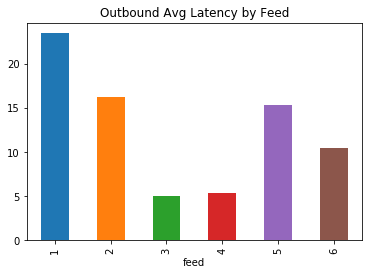

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
input = pd.read_csv("/home/glenn/git/clojure-news-feed/client/ml/etl/latency.csv")
feed = input.groupby("feed")
feed['outbound POST'].agg(np.mean).plot(kind = "bar", x = "feed implementation", y = "duration (ms)", title = "Outbound Avg Latency by Feed")

Now let's take a look at the friends latency by feed. Notice that the only feed implementation where outbound latency was significantly less than friends latency was feed 5.

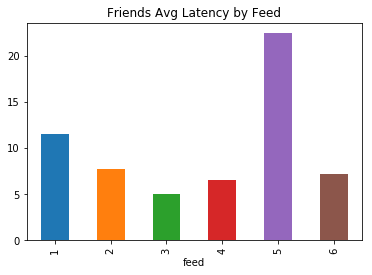

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
input = pd.read_csv("/home/glenn/git/clojure-news-feed/client/ml/etl/latency.csv")
feed = input.groupby("feed")
feed['friends POST'].agg(np.mean).plot(kind = "bar", x = "feed implementation", y = "duration (ms)", title = "Friends Avg Latency by Feed")
